Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# OSCILACIJE (prigušene i prinudne)
## 22.03.2021. 

# Ana Zoric 0009/2020

***
<font color='red'>
Preimenovati svesku: File/Rename u __prigusene_prinudne_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 1__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$. Poznate su vrednosti sopstvene kružne učestanosti $\omega_0$, faktora prigušenja $\alpha$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prigusene__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$ i $\alpha$.

In [1]:
def prigusene(y, t, w0, alpha):
    y1, y2 = y
    return [y2, -2*alpha*y2 - w0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

c) Definisati vrednosti sopstvene kružne učestanosti $ω_0 = 1$ rad/s, i listu četiri različite vrednosti koje uzima faktor prigušenja: $α_1 = ω_0$, $α_2 = ω_0/10$, $α_3 = 15ω_0$ i $α_4 = 0$. <br>
Definisati početne uslove: telo se u početnom trenutku nalazi na rastojanju $x_0 = 10$ m od ravnotežnog položaja i ima brzinu $v_0 = 20$ m/s.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $1000$ ekvidistantnih tačaka.

In [3]:
w0 = 1
alpha = [w0, w0/10, 15 * w0, 0]
x0 = 10
v0 = 20
t = np.linspace(0, 60, 1000)

d) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju vremenski odzivi $x(t)$ za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja $α$.<br>
_Da bi se prikazao grafik potrebno je izvršiti komandu plt.show()_

<Figure size 432x288 with 0 Axes>

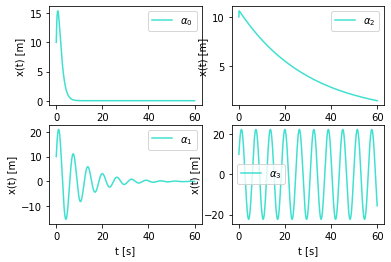

In [4]:
plt.figure(1)
_, axis = plt.subplots(2, 2)
for i, a in enumerate(alpha):
    rez = odeint(prigusene, (x0, v0), t, (w0, a))
    plot = axis[i % 2, int(i / 2)]
    plot.plot(t, np.transpose(rez)[0], color="turquoise", label='$\\alpha_' + str(i) + '$')
    plot.set(xlabel='t [s]', ylabel='x(t) [m]')
    plot.legend()
plt.show()

e) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju fazni dijagrami za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“x [m]” i “v(t) [m/s]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja  $α$ .

<Figure size 432x288 with 0 Axes>

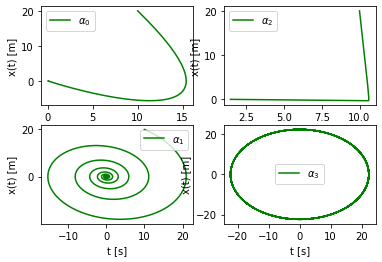

In [5]:
plt.figure(1)
_, axis = plt.subplots(2, 2)
for i, a in enumerate(alpha):
    x, v = np.transpose(odeint(prigusene, (x0, v0), t, (w0, a)))
    plot = axis[i % 2, int(i / 2)]
    plot.plot(x, v, color="green",label='$\\alpha_' + str(i) + '$')
    plot.set( xlabel='t [s]', ylabel='x(t) [m]')
    plot.legend()
plt.show()

f) Na osnovu prethodna dva grafika odrediti tip oscilacija za svaku od vrednosti koeficijenta prigušenja. Proceniti vremenski trenutak u kom se dostiže stacionarno stanje (ako se dostiže) i navesti ga za svaki od prikazanih grafika. Dodatno, za svaki tip oscilacija prokomentarisati i ukratko prodiskutovati oblik faznog dijagrama.

za a0: oscilacije su kriticno prigusene, stacionarno stanje oko 10.sekunde, sa grafika se vidi da se telo brzo vraca u pocetni polozaj
za a1: kvazi periodicne, stacionarno stanje je oko 60.sekunde, grafik je spirala sto ukazuje na to da se period menja
za a2: aperiodicne, stacionarno stanje je oko 60.sekunde, grafik je 'ostar' 
za a3: linearne harmonijske, nema stacionarnog stanja, grafik je zatvorena elipsa

g) Napisati kod koji omogućava da se na istom dijagramu iscrtaju zavisnost kinetičke (plavom bojom) i potencijalne energije (crvenom bojom) sistema od vremena $t$ za faktor prigušenja $α = ω_0/10$, ako je masa tela koje osciluje $m = 1 $kg.

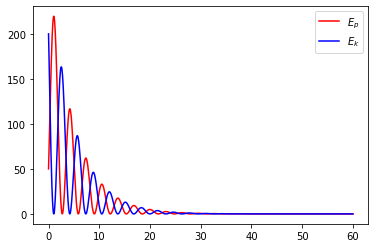

In [6]:
m = 1
a = w0 / 10
x, v = np.transpose(odeint(prigusene, (x0, v0), t, (w0, a)))
k = w0**2 * m
Ek = (m * v**2) / 2
Ep = (k * x**2) / 2
plt.plot(t, Ep, label='$E_p$', color='red')
plt.plot(t, Ek, label='$E_k$', color='blue')
plt.legend()
plt.show()

h) Napisati kod koji omogućava da se iscrta zavisnost ukupne energije sistema za parametre kao u prethodnoj tački (tačka g)) i komentarisati dobijeni grafik. Zašto grafik nije glatka, opadajuća funkcija?

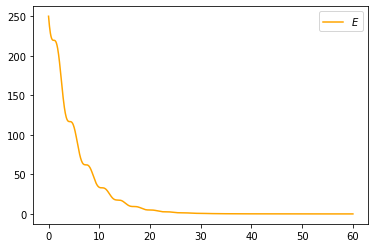

In [7]:
m = 1
a = w0 / 10
x, v = np.transpose(odeint(prigusene, (x0, v0), t, (w0, a)))
k = w0**2 * m
Ek = (m * v**2) / 2
Ep = (k * x**2) / 2
plt.plot(t, Ek + Ep, label='$E$', color='orange')
plt.legend()
plt.show()

zbog male nepreciznosti programa prilikom resavanja diferencijalne jednacine linija nije glatka

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 2__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$ i spoljašnja harmonijska sila amplitude $F_0$ i kružne učestanosti $Ω$ koja ima za cilj da kompenzuje disipaciju energije u ovom sistemu. Poznate su vrednosti sopstvene kružne učestanosti $ω_0$, faktora prigušenja $α$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prinudne__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$, $\alpha$, $F_0$, $m$ i $Ω$.

In [108]:
def prinudne(y, t, w0, alpha, F0, m, w):
    y1, y2 = y
    return [y2, F0/m * np.sin(w * t) - 2*alpha*y2 - w0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula 

In [109]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

c) Poznate su vrednosti sopstvene kružne učestanosti $ω_0 = 10$ rad/s, faktora prigušenja $α = ω_0/20$, amplitude $F_0 = 20$ N i kružne učestanosti $Ω = 2$ rad/s prinudne sile. Masa tela je $m = 1$ kg.<br>
Definisati početne uslove: Telo u početnom trenutku miruje na rastojanju $x_0 = 10$ m od ravnotežnog položaja.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $6000$ ekvidistantnih tačaka.

In [110]:
w0 = 10
alpha = w0 / 20
F0 = 20
x0 = 10
w = 2
m = 1
t = np.linspace(0, 60, 6000)

d) Napisati kod koji omogućava da se iscrta grafik vremenskog odziva $x(t)$. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). 

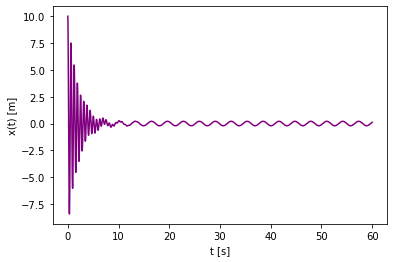

In [113]:
x, _ = np.transpose(odeint(prinudne, (x0, 0), t, (w0, alpha, F0, m, w)))
plt.plot(t, x, color="purple")
plt.xlabel('t [s]')
plt.ylabel('x(t) [m]')
plt.show()

e) Napisati kod koji omogućava da se iscrta fazni dijagram $v(x)$. Označiti ose grafika (“x(t) [m]” i “v(t) [m/s]”). 

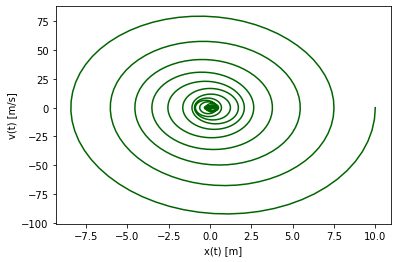

In [114]:
x, v = np.transpose(odeint(prinudne, (x0, 0), t, (w0, alpha, F0, m, w)))
plt.plot(x, v, color="darkgreen")
plt.xlabel('x(t) [m]')
plt.ylabel('v(t) [m/s]')
plt.show()

f) Šta se uočava na faznom dijagramu u trenutku kada u vremenskom odzivu preostaju samo oscilacije kao posledica prinudne sile? Napisati kod koji omogućava da se iscrta dodatni grafik, zumirani fazni dijagram, tako da limiti za $x$ osu budu od $-0.5$ do $0.5$, a za $y$ osu od $-4$ do $4$. 

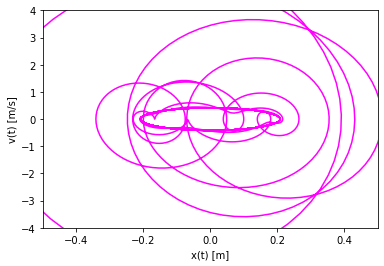

In [115]:
x, v = np.transpose(odeint(prinudne, (x0, 0), t, (w0, alpha, F0, m, w)))
plt.plot(x, v, color='magenta')
plt.xlabel('x(t) [m]')
plt.ylabel('v(t) [m/s]')
plt.xlim(-0.5, 0.5)
plt.ylim(-4, 4)
plt.show()

na sredini grafika se nalazi zatvorena elipsa zbog prinudne sile

g) Neka se frekvencija prinudne sile menja u opsegu frekvencija $Ω = [0, 2ω_0]$ sa korakom $ω_0/50$. Napisati kod koji omogućava da se iscrta amplitudska karaterisktika prinudnog odziva $A(Ω)$ koristeći se analitičkim izrazom za amplitudsku karakteristiku (sa slajdova). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "analitička metoda".

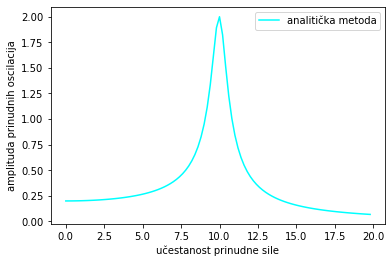

In [116]:
W = np.arange(0, 2*w0, w0/50)
A = (F0/m) / np.sqrt((w0**2 - W**2)**2 + (2 * alpha * W)**2)
plt.plot(W, A, label='analitička metoda', color="cyan")
plt.xlabel('učestanost prinudne sile')
plt.ylabel('amplituda prinudnih oscilacija')
plt.legend()
plt.show()

h) Napisati kod koji omogućava numeričko određivanje amplitudske karakteristike. Iscrtati amplitudsku karaterisktiku dobijenu numeričkom metodom (isprekidanom crvenom linijom). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "numerička metoda".<br>
_Hint:_ Rešiti jednačinu za svako $Ω$ iz opsega $[0, 2ω_0]$ na vremenskoj osi od $0$ do $300$ sekundi u $2000$ ekvidistantnih tačaka. Vremenska osa je produžena da bi bili sigurni da je sistem dostigao stacionarno stanje, tj. da je prelazni režim u kom postoje prigušene oscilacije završen. Amplituda oscilacija u stacionarnom odzivu se može naći kao maksimalni element niza na zadatom vremenskom intervalu. 

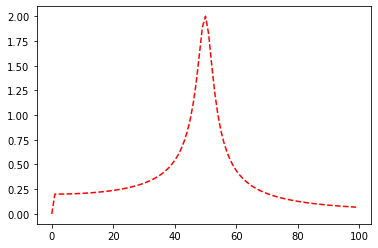

In [69]:
start_from = 1500
t1 = np.linspace(0, 300, 2000)
ampl = []
for i, w in enumerate(W):
    x, _ = np.transpose(odeint(prinudne, (x0, 0), t1, (w0, alpha, F0, m, w)))
    ampl.append(max(x[start_from:]))
plt.plot(ampl, color='red', linestyle='dashed')
#plt.xlabel('vreme [s]')
#plt.ylabel('x(t) [m]')
plt.show()

i)	Napisati kod koji omogućava da se iz numerički dobijene amplitudske karakteristike odredi pri kojoj frekvenciji pobudne sile numerička kriva dostiže maksimalnu vrednost. Ova vrednost frekvencije naziva se rezonantna frekvencija. Prikazati numerički određenu vrednost za rezonantnu učestanost. Prikazati vrednost za rezonantnu učestanost koja se dobija na osnovu analitičkog izraza prikazanog na slajdovima. Izračunati relativno odstupanje za rezonantnu učestanost određenu numerički u odnosu na učestanost određenu na osnovu analitičkog izraza. 

In [70]:
w_max_num = ampl.index(max(ampl)) * w0 / 50
w_max_anal = np.sqrt(w0**2 - 2 * alpha**2)
print((w_max_num - w_max_anal) / w_max_num)

0.0025031328369998105
